In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
x_train = pd.read_csv('Diabetes_XTrain.csv')
y_train = pd.read_csv('Diabetes_YTrain.csv')

In [3]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [4]:
y_train.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [5]:
y_train.shape

(576, 1)

In [6]:
x_test = pd.read_csv('Diabetes_XTest.csv')
x_test = x_test.values

In [7]:
x_train.shape

(576, 8)

In [8]:
x_train = x_train.values
#y_train = y_train.values

In [9]:
x_train.shape
y_train.shape

(576, 1)

In [10]:
y_train = np.reshape(y_train, y_train.size)
y_train = y_train.values.flatten()
freq = np.bincount(y_train)
num = np.unique(y_train)

In [11]:
freq

array([375, 201], dtype=int64)

In [12]:
num.flatten()

array([0, 1], dtype=int64)

<BarContainer object of 2 artists>

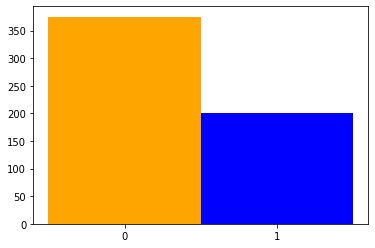

In [13]:
plt.bar(num,freq,tick_label = num, width = 1, color = ['orange','blue'])

In [14]:
#classification - whether patient is diabetic or not

In [15]:
def dist(x1,x2):
    
    return(np.sqrt(sum(x1-x2)**2))

In [16]:
def knn(x,y,query_point,k = 5):
    
    vals = []
    
    for i in range(x.shape[0]):
        
        d = dist(query_point,x[i])
        vals.append([d,y[i]])
        
    #print(vals)
    
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    new_vals = np.unique(vals,return_counts = True)
    
    index = new_vals[1].argmax()
    
    pred = new_vals[0][index]
    
    return(pred)
    

In [17]:
k = int(math.sqrt(x_train.shape[0]))
k+1

25

In [18]:
n = x_test.shape[0]
n

192

In [33]:
pred = []

for i in range(n):
    
    y_pred = knn(x_train,y_train,x_test[i],k)
        
    pred.append(y_pred)

pred = np.array(pred)

In [34]:
pred = pred.astype(int)

In [35]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
np.savetxt("y_test_pred.csv", pred, delimiter=",")